In [2]:
#kütüphanelerin import edilmesi ve dosyanın Excel'den okunması
import numpy as np
import pandas as pd
df=pd.read_csv("farmington2.csv",sep=',')
print(df.head())

   Unnamed: 0  currentSmoker  cigsPerDay  prevalentHyp  totChol  sysBP  diaBP  \
0           0              1        30.0             1    225.0  150.0   95.0   
1           1              0         0.0             0    205.0  138.0   71.0   
2        1279              1        10.0             0    192.0   96.5   71.0   
3           3              1        20.0             0    291.0  112.0   78.0   
4        1273              0         0.0             0    250.0  117.5   75.0   

   heartRate  glucose  TenYearCHD  
0       65.0    103.0           1  
1       60.0     85.0           1  
2       61.0     68.0           0  
3       80.0     89.0           1  
4       75.0     91.0           0  


In [3]:
#gereksiz ["Unnamed: 0"] sütununun kaldırılması
df.drop(["Unnamed: 0"],axis=1,inplace=True)
print(df.tail())

      currentSmoker  cigsPerDay  prevalentHyp  totChol  sysBP  diaBP  \
1266              1        20.0             0    313.0  100.0   71.0   
1267              0         0.0             1    260.0  141.5   89.0   
1268              1        43.0             0    226.0  115.0   85.5   
1269              1        20.0             1    214.0  147.0   74.0   
1270              0         0.0             1    225.0  124.5   92.5   

      heartRate  glucose  TenYearCHD  
1266       79.0     78.0           0  
1267       76.0     79.0           0  
1268       75.0     75.0           0  
1269       96.0     87.0           0  
1270       95.0     83.0           0  


In [4]:
#sayısal verilerin incelenmesi
print(df.describe()) 

       currentSmoker   cigsPerDay  prevalentHyp      totChol        sysBP  \
count    1271.000000  1268.000000   1271.000000  1256.000000  1271.000000   
mean        0.512195     9.906151      0.376869   238.607484   136.721479   
std         0.500048    12.578274      0.484792    45.003439    24.899671   
min         0.000000     0.000000      0.000000   107.000000    83.500000   
25%         0.000000     0.000000      0.000000   209.000000   119.000000   
50%         1.000000     1.000000      0.000000   237.000000   132.000000   
75%         1.000000    20.000000      1.000000   265.000000   150.000000   
max         1.000000    60.000000      1.000000   600.000000   295.000000   

             diaBP    heartRate      glucose   TenYearCHD  
count  1271.000000  1271.000000  1161.000000  1271.000000  
mean     84.338710    76.216365    84.875108     0.495673  
std      13.136426    12.065879    31.649984     0.500178  
min      48.000000    48.000000    40.000000     0.000000  
25%   

In [5]:
#Veri setine genel bakış
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 9 columns):
currentSmoker    1271 non-null int64
cigsPerDay       1268 non-null float64
prevalentHyp     1271 non-null int64
totChol          1256 non-null float64
sysBP            1271 non-null float64
diaBP            1271 non-null float64
heartRate        1271 non-null float64
glucose          1161 non-null float64
TenYearCHD       1271 non-null int64
dtypes: float64(6), int64(3)
memory usage: 89.4 KB
None


In [6]:
#Kayıp verilerin tespiti 
print(df.isnull().sum())
print(df.isnull().sum().sum())

currentSmoker      0
cigsPerDay         3
prevalentHyp       0
totChol           15
sysBP              0
diaBP              0
heartRate          0
glucose          110
TenYearCHD         0
dtype: int64
128


In [7]:
#İnterpolasyon yöntemiyle kayıp verilerin doldurulması
df["cigsPerDay"]=df["cigsPerDay"].interpolate()
df["totChol"]=df["totChol"].interpolate()
df["glucose"]=df["glucose"].interpolate()

In [8]:
print(df.isnull().sum().sum())

0


In [9]:
#veri tekrarı kontrolü
print(df[df.duplicated()])

Empty DataFrame
Columns: [currentSmoker, cigsPerDay, prevalentHyp, totChol, sysBP, diaBP, heartRate, glucose, TenYearCHD]
Index: []


In [10]:
#Aşırı verilerin kontrolü
print(df["cigsPerDay"].mean())
print(df["cigsPerDay"].std())
print(np.median(df["cigsPerDay"]))

9.933910306845004
12.578460794441465
1.0


In [11]:
print(df["totChol"].mean())
print(df["totChol"].std())
print(np.median(df["totChol"]))

238.5507474429583
44.82187824183549
237.0


In [12]:
print(df["sysBP"].mean())
print(df["sysBP"].std())
print(np.median(df["sysBP"]))

136.72147915027537
24.899671180499684
132.0


In [13]:
print(df["diaBP"].mean())
print(df["diaBP"].std())
print(np.median(df["diaBP"]))

84.33870967741936
13.136426349330872
82.5


In [14]:
print(df["heartRate"].mean())
print(df["heartRate"].std())
print(np.median(df["heartRate"]))

76.21636506687648
12.065878864016032
75.0


In [15]:
print(df["glucose"].mean())
print(df["glucose"].std())
print(np.median(df["glucose"]))

85.02439024390245
31.009261443740677
79.0


In [16]:
#Normalizasyon
y=df.TenYearCHD.values
x_data=df.drop(["TenYearCHD"],axis=1).values
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [17]:
#Veri setinin train - test şeklinde ayrılması ve boyutları
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (1016, 8)
y_train: (1016,)
x_test: (255, 8)
y_test: (255,)


In [18]:
#Parametre eklemeden yapılan MLP eğitimi
from sklearn.neural_network import MLPClassifier

mlpc=MLPClassifier(random_state=1)
mlpc.fit(x_train,y_train)

C:\Users\ABBSCBN\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [19]:
print("mlpc score:",mlpc.score(x_test,y_test))

mlpc score: 0.6235294117647059


In [20]:
#Genel değerlendirilmesi - Accuracy, F1 skoru, Karışıklık Matrisi 
import sklearn.metrics as metrics

y_pred=mlpc.predict(x_test)
acc=metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",acc)
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)
cr=metrics.classification_report(y_test,y_pred)
print(cr)

Accuracy: 0.6235294117647059
[[91 31]
 [65 68]]
              precision    recall  f1-score   support

           0       0.58      0.75      0.65       122
           1       0.69      0.51      0.59       133

   micro avg       0.62      0.62      0.62       255
   macro avg       0.64      0.63      0.62       255
weighted avg       0.64      0.62      0.62       255



In [21]:
#Kfold cross validation ile veri seti analizi.K=3
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

scores=[]

kf=KFold(n_splits=3,random_state=1)
mlpc=MLPClassifier(solver="sgd",activation="logistic",hidden_layer_sizes=(3,5,3))

for train_indexler,test_indexler in kf.split(x):
    mlpc.fit(x[train_indexler],y[train_indexler])
    score=mlpc.score(x[test_indexler],y[test_indexler])
    scores.append(score)
    print(score)
    
print("ortalama score:",np.mean(scores))

0.5
0.4693396226415094
0.4562647754137116
ortalama score: 0.475201466018407


In [22]:
#Kfold cross validation ile veri seti analizi. K=10
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

scores=[]

kf=KFold(n_splits=10,random_state=1)
mlpc=MLPClassifier(solver="sgd",activation="logistic",hidden_layer_sizes=(3,5,3))

for train_indexler,test_indexler in kf.split(x):
    mlpc.fit(x[train_indexler],y[train_indexler])
    score=mlpc.score(x[test_indexler],y[test_indexler])
    scores.append(score)
    print(score)
    
print("ortalama score:",np.mean(scores))

0.5390625
0.48031496062992124
0.5433070866141733
0.5196850393700787
0.4566929133858268
0.5196850393700787
0.4645669291338583
0.4881889763779528
0.5511811023622047
0.5984251968503937
ortalama score: 0.5161109744094488


In [23]:
#grid search cv ile en iyi parametrelerin belirlenmesi cv=3
from sklearn.model_selection import GridSearchCV

mlpc_params={"alpha":[0.1,0.01,0.001,0.0001],
            "hidden_layer_sizes":[(10,10,10),(3,3,3),(100,100),(3,5)],
            "solver":["lbfgs","adam","sgd"]}

mlpc=MLPClassifier(activation="logistic",random_state=1)

mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=3,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    9.3s finished


In [24]:
#en iyi parametrelerin gösterimi
print(mlpc_cv_model.best_params_)

{'alpha': 0.1, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'lbfgs'}


In [25]:
#belirlenen parametrelerle model sonucu
mlpc1=MLPClassifier(alpha=0.1,hidden_layer_sizes=(10,10,10),solver="lbfgs",max_iter=100,random_state=1)
mlpc1.fit(x_train,y_train)
print("score:",mlpc1.score(x_test,y_test))

score: 0.6274509803921569


In [30]:
#grid search cv ile en iyi parametrelerin belirlenmesi cv=10
from sklearn.model_selection import GridSearchCV

mlpc_params={"alpha":[0.1,0.01,0.001,0.0001],
            "hidden_layer_sizes":[(10,10,10),(3,5,3),(100,100),(3,5)],
            "solver":["lbfgs","adam","sgd"]}

mlpc=MLPClassifier(activation="relu",random_state=1)

mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  2.3min finished
C:\Users\ABBSCBN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [31]:
#en iyi parametrelerin gösterimi cv=10
print(mlpc_cv_model.best_params_)

{'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'lbfgs'}


In [36]:
#belirlenen parametrelerle model sonucu
mlpc1=MLPClassifier(alpha=0.0001,hidden_layer_sizes=(10,10,10),solver="lbfgs",max_iter=1000,random_state=1)
mlpc1.fit(x_train,y_train)
print("score:",mlpc1.score(x_test,y_test))

score: 0.6274509803921569


In [37]:
#belirlenen parametrelerle model sonucu max_iter=10
mlpc2=MLPClassifier(alpha=0.0001,hidden_layer_sizes=(10,10,10),solver="lbfgs",max_iter=10,random_state=1)
mlpc2.fit(x_train,y_train)
print("score:",mlpc2.score(x_test,y_test))

score: 0.6


In [38]:
#belirlenen parametrelerle model sonucu max_iter=1000
mlpc3=MLPClassifier(alpha=0.0001,hidden_layer_sizes=(10,10,10),solver="lbfgs",max_iter=100,random_state=1)
mlpc3.fit(x_train,y_train)
print("score:",mlpc3.score(x_test,y_test))

score: 0.6352941176470588


In [39]:
import sklearn.metrics as metrics

y_pred=mlpc3.predict(x_test)
acc=metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",acc)
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)
cr=metrics.classification_report(y_test,y_pred)
print(cr)

Accuracy: 0.6352941176470588
[[84 38]
 [55 78]]
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       122
           1       0.67      0.59      0.63       133

   micro avg       0.64      0.64      0.64       255
   macro avg       0.64      0.64      0.64       255
weighted avg       0.64      0.64      0.63       255



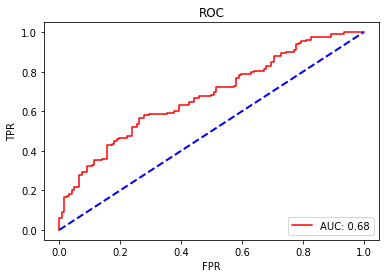

In [41]:
#roc and auc çizimi
import matplotlib.pyplot as plt
probs=mlpc3.predict_proba(x_test)
#print(probs)
probs=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,probs)
auc_value=metrics.auc(fpr,tpr)
plt.title("ROC")
plt.plot(fpr,tpr,label="AUC: "+str(round(auc_value,2)),color="red")
plt.plot([0,1],[0,1],color="blue",lw=2,linestyle="--")
plt.legend(loc="lower right")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

In [42]:
#Seaborn kütüphanesi tanımlanması
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

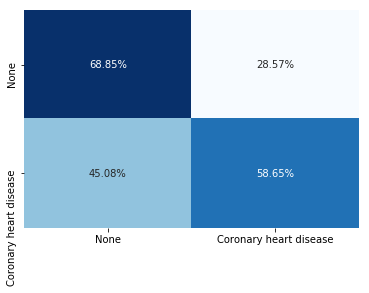

In [43]:
class_adlari=["None","Coronary heart disease"]
sns.heatmap(cm/cm.sum(axis=1), annot=True, cbar=False, cmap="Blues",xticklabels=class_adlari,yticklabels=class_adlari,fmt=".2%")

In [45]:
#Keras kütüphaneleri import edilmesi
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [46]:
#modelin train - test çin ayrılması
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [47]:
#Eğitilen veri boyutunun gösterilmesi
input_shape=x_train.shape[1:]
print(input_shape)

(8,)


In [49]:
#Model katmanlarının oluşturulması
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=8))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(64, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(128, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [50]:
#modelin compile edilmesi
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [51]:
#modelin fit edilmesi iterasyon sayı=200
egitim=model.fit(x_train,y_train,epochs=200,batch_size=32,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 1016 samples, validate on 255 samples
Epoch 1/200
1016/1016 [==============================] - 1s - loss: 1.3525 - acc: 0.4734 - val_loss: 1.5997 - val_acc: 0.4784
Epoch 2/200
1016/1016 [==============================] - 0s - loss: 0.8853 - acc: 0.5620 - val_loss: 1.4929 - val_acc: 0.4784
Epoch 3/200
1016/1016 [==============================] - 0s - loss: 0.8112 - acc: 0.5748 - val_loss: 1.4862 - val_acc: 0.4784
Epoch 4/200
1016/1016 [==============================] - 0s - loss: 0.7734 - acc: 0.5630 - val_loss: 1.5108 - val_acc: 0.4784
Epoch 5/200
1016/1016 [==============================] - 0s - loss: 0.7417 - acc: 0.5837 - val_loss: 1.5426 - val_acc: 0.4784
Epoch 6/200
1016/1016 [==============================] - 0s - loss: 0.7554 - acc: 0.5492 - val_loss: 1.5599 - val_acc: 0.4784
Epoch 7/200
1016/1016 [==============================] - 0s - loss: 0.7332 - acc: 0.5541 - val_loss: 1.5393 - val_acc: 0.4824
Epoch 8/200
1016/1016 [

1016/1016 [==============================] - 0s - loss: 0.6611 - acc: 0.6053 - val_loss: 0.6453 - val_acc: 0.6196
Epoch 64/200
1016/1016 [==============================] - 0s - loss: 0.6576 - acc: 0.6152 - val_loss: 0.6424 - val_acc: 0.6078
Epoch 65/200
1016/1016 [==============================] - 0s - loss: 0.6670 - acc: 0.6024 - val_loss: 0.6422 - val_acc: 0.6118
Epoch 66/200
1016/1016 [==============================] - 0s - loss: 0.6700 - acc: 0.6053 - val_loss: 0.6472 - val_acc: 0.6314
Epoch 67/200
1016/1016 [==============================] - 0s - loss: 0.6682 - acc: 0.6053 - val_loss: 0.6424 - val_acc: 0.6118
Epoch 68/200
1016/1016 [==============================] - 0s - loss: 0.6735 - acc: 0.5797 - val_loss: 0.6458 - val_acc: 0.6157
Epoch 69/200
1016/1016 [==============================] - 0s - loss: 0.6536 - acc: 0.6181 - val_loss: 0.6429 - val_acc: 0.6314
Epoch 70/200
1016/1016 [==============================] - 0s - loss: 0.6704 - acc: 0.6053 - val_loss: 0.6418 - val_acc: 0.61

1016/1016 [==============================] - 0s - loss: 0.6569 - acc: 0.5974 - val_loss: 0.6361 - val_acc: 0.6196
Epoch 192/200
1016/1016 [==============================] - 0s - loss: 0.6558 - acc: 0.6073 - val_loss: 0.6412 - val_acc: 0.6275
Epoch 193/200
1016/1016 [==============================] - 0s - loss: 0.6497 - acc: 0.6319 - val_loss: 0.6564 - val_acc: 0.6235
Epoch 194/200
1016/1016 [==============================] - 0s - loss: 0.6547 - acc: 0.6102 - val_loss: 0.6509 - val_acc: 0.6275
Epoch 195/200
1016/1016 [==============================] - 0s - loss: 0.6572 - acc: 0.6299 - val_loss: 0.6484 - val_acc: 0.6235
Epoch 196/200
1016/1016 [==============================] - 0s - loss: 0.6490 - acc: 0.6358 - val_loss: 0.6469 - val_acc: 0.6314
Epoch 197/200
1016/1016 [==============================] - 0s - loss: 0.6567 - acc: 0.6161 - val_loss: 0.6491 - val_acc: 0.6275
Epoch 198/200
1016/1016 [==============================] - 0s - loss: 0.6491 - acc: 0.6280 - val_loss: 0.6432 - val_ac

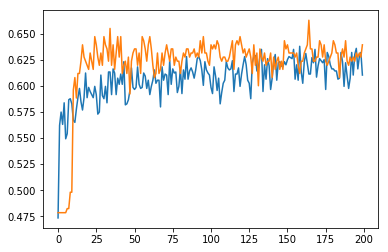

In [52]:
#model acc ve va_acc değerlerinin artış grafiği
plt.plot(egitim.history["acc"])
plt.plot(egitim.history["val_acc"])
plt.show()

In [53]:
#modelin fit edilmesi iterasyon sayı=1000
egitim=model.fit(x_train,y_train,epochs=1000,batch_size=32,validation_data=(x_test,y_test))

Train on 1016 samples, validate on 255 samples
Epoch 1/1000
1016/1016 [==============================] - 0s - loss: 0.6638 - acc: 0.6132 - val_loss: 0.6503 - val_acc: 0.6235
Epoch 2/1000
1016/1016 [==============================] - 0s - loss: 0.6477 - acc: 0.6171 - val_loss: 0.6467 - val_acc: 0.6275
Epoch 3/1000
1016/1016 [==============================] - 0s - loss: 0.6583 - acc: 0.6161 - val_loss: 0.6505 - val_acc: 0.6118
Epoch 4/1000
1016/1016 [==============================] - 0s - loss: 0.6582 - acc: 0.6152 - val_loss: 0.6433 - val_acc: 0.6314
Epoch 5/1000
1016/1016 [==============================] - 0s - loss: 0.6564 - acc: 0.6181 - val_loss: 0.6466 - val_acc: 0.6118
Epoch 6/1000
1016/1016 [==============================] - 0s - loss: 0.6529 - acc: 0.6319 - val_loss: 0.6380 - val_acc: 0.6392
Epoch 7/1000
1016/1016 [==============================] - 0s - loss: 0.6523 - acc: 0.6142 - val_loss: 0.6463 - val_acc: 0.6157
Epoch 8/1000
1016/1016 [==============================] - 0s - l

1016/1016 [==============================] - 0s - loss: 0.6530 - acc: 0.6211 - val_loss: 0.6469 - val_acc: 0.6392
Epoch 128/1000
1016/1016 [==============================] - 0s - loss: 0.6544 - acc: 0.6319 - val_loss: 0.6416 - val_acc: 0.6392
Epoch 129/1000
1016/1016 [==============================] - 0s - loss: 0.6503 - acc: 0.6299 - val_loss: 0.6539 - val_acc: 0.6078
Epoch 130/1000
1016/1016 [==============================] - 0s - loss: 0.6501 - acc: 0.6220 - val_loss: 0.6490 - val_acc: 0.6353
Epoch 131/1000
1016/1016 [==============================] - 0s - loss: 0.6577 - acc: 0.6132 - val_loss: 0.6402 - val_acc: 0.6196
Epoch 132/1000
1016/1016 [==============================] - 0s - loss: 0.6555 - acc: 0.6063 - val_loss: 0.6419 - val_acc: 0.6275
Epoch 133/1000
1016/1016 [==============================] - 0s - loss: 0.6455 - acc: 0.6280 - val_loss: 0.6388 - val_acc: 0.6235
Epoch 134/1000
1016/1016 [==============================] - 0s - loss: 0.6443 - acc: 0.6270 - val_loss: 0.6398 -

1016/1016 [==============================] - 0s - loss: 0.6411 - acc: 0.6289 - val_loss: 0.6573 - val_acc: 0.6235
Epoch 254/1000
1016/1016 [==============================] - 0s - loss: 0.6621 - acc: 0.6191 - val_loss: 0.6514 - val_acc: 0.6314
Epoch 255/1000
1016/1016 [==============================] - 0s - loss: 0.6564 - acc: 0.6289 - val_loss: 0.6536 - val_acc: 0.6314
Epoch 256/1000
1016/1016 [==============================] - 0s - loss: 0.6501 - acc: 0.6329 - val_loss: 0.6505 - val_acc: 0.6392
Epoch 257/1000
1016/1016 [==============================] - 0s - loss: 0.6579 - acc: 0.6093 - val_loss: 0.6475 - val_acc: 0.6431
Epoch 258/1000
1016/1016 [==============================] - 0s - loss: 0.6502 - acc: 0.6280 - val_loss: 0.6459 - val_acc: 0.6392
Epoch 259/1000
1016/1016 [==============================] - 0s - loss: 0.6643 - acc: 0.6014 - val_loss: 0.6514 - val_acc: 0.6353
Epoch 260/1000
1016/1016 [==============================] - 0s - loss: 0.6546 - acc: 0.6053 - val_loss: 0.6530 -

1016/1016 [==============================] - 0s - loss: 0.6448 - acc: 0.6171 - val_loss: 0.6530 - val_acc: 0.6314
Epoch 380/1000
1016/1016 [==============================] - 0s - loss: 0.6474 - acc: 0.6368 - val_loss: 0.6467 - val_acc: 0.6353
Epoch 381/1000
1016/1016 [==============================] - 0s - loss: 0.6493 - acc: 0.6181 - val_loss: 0.6516 - val_acc: 0.6196
Epoch 382/1000
1016/1016 [==============================] - 0s - loss: 0.6544 - acc: 0.6211 - val_loss: 0.6625 - val_acc: 0.6157
Epoch 383/1000
1016/1016 [==============================] - 0s - loss: 0.6441 - acc: 0.6240 - val_loss: 0.6549 - val_acc: 0.6275
Epoch 384/1000
1016/1016 [==============================] - 0s - loss: 0.6535 - acc: 0.6250 - val_loss: 0.6488 - val_acc: 0.6314
Epoch 385/1000
1016/1016 [==============================] - 0s - loss: 0.6526 - acc: 0.6417 - val_loss: 0.6482 - val_acc: 0.6196
Epoch 386/1000
1016/1016 [==============================] - 0s - loss: 0.6582 - acc: 0.6033 - val_loss: 0.6464 -

1016/1016 [==============================] - 0s - loss: 0.6541 - acc: 0.6260 - val_loss: 0.6532 - val_acc: 0.6196
Epoch 506/1000
1016/1016 [==============================] - 0s - loss: 0.6373 - acc: 0.6407 - val_loss: 0.6524 - val_acc: 0.6353
Epoch 507/1000
1016/1016 [==============================] - 0s - loss: 0.6522 - acc: 0.6102 - val_loss: 0.6533 - val_acc: 0.6275
Epoch 508/1000
1016/1016 [==============================] - 0s - loss: 0.6481 - acc: 0.6250 - val_loss: 0.6516 - val_acc: 0.6196
Epoch 509/1000
1016/1016 [==============================] - 0s - loss: 0.6404 - acc: 0.6457 - val_loss: 0.6416 - val_acc: 0.6392
Epoch 510/1000
1016/1016 [==============================] - 0s - loss: 0.6434 - acc: 0.6398 - val_loss: 0.6520 - val_acc: 0.6196
Epoch 511/1000
1016/1016 [==============================] - 0s - loss: 0.6469 - acc: 0.6220 - val_loss: 0.6456 - val_acc: 0.6157
Epoch 512/1000
1016/1016 [==============================] - 0s - loss: 0.6482 - acc: 0.6230 - val_loss: 0.6416 -

1016/1016 [==============================] - 0s - loss: 0.6483 - acc: 0.6181 - val_loss: 0.6680 - val_acc: 0.6078
Epoch 632/1000
1016/1016 [==============================] - 0s - loss: 0.6459 - acc: 0.6427 - val_loss: 0.6585 - val_acc: 0.6157
Epoch 633/1000
1016/1016 [==============================] - 0s - loss: 0.6424 - acc: 0.6378 - val_loss: 0.6512 - val_acc: 0.6235
Epoch 634/1000
1016/1016 [==============================] - 0s - loss: 0.6532 - acc: 0.6280 - val_loss: 0.6462 - val_acc: 0.6392
Epoch 635/1000
1016/1016 [==============================] - 0s - loss: 0.6495 - acc: 0.6181 - val_loss: 0.6553 - val_acc: 0.6235
Epoch 636/1000
1016/1016 [==============================] - 0s - loss: 0.6516 - acc: 0.6230 - val_loss: 0.6607 - val_acc: 0.6275
Epoch 637/1000
1016/1016 [==============================] - 0s - loss: 0.6449 - acc: 0.6270 - val_loss: 0.6616 - val_acc: 0.6235
Epoch 638/1000
1016/1016 [==============================] - 0s - loss: 0.6450 - acc: 0.6417 - val_loss: 0.6527 -

1016/1016 [==============================] - 0s - loss: 0.6453 - acc: 0.6319 - val_loss: 0.6530 - val_acc: 0.6039
Epoch 758/1000
1016/1016 [==============================] - 0s - loss: 0.6372 - acc: 0.6329 - val_loss: 0.6622 - val_acc: 0.6118
Epoch 759/1000
1016/1016 [==============================] - 0s - loss: 0.6496 - acc: 0.6191 - val_loss: 0.6742 - val_acc: 0.6157
Epoch 760/1000
1016/1016 [==============================] - 0s - loss: 0.6460 - acc: 0.6388 - val_loss: 0.6665 - val_acc: 0.6118
Epoch 761/1000
1016/1016 [==============================] - 0s - loss: 0.6431 - acc: 0.6309 - val_loss: 0.6504 - val_acc: 0.6118
Epoch 762/1000
1016/1016 [==============================] - 0s - loss: 0.6477 - acc: 0.6280 - val_loss: 0.6713 - val_acc: 0.6078
Epoch 763/1000
1016/1016 [==============================] - 0s - loss: 0.6404 - acc: 0.6388 - val_loss: 0.6715 - val_acc: 0.6078
Epoch 764/1000
1016/1016 [==============================] - 0s - loss: 0.6595 - acc: 0.6211 - val_loss: 0.6569 -

1016/1016 [==============================] - 0s - loss: 0.6508 - acc: 0.6299 - val_loss: 0.6515 - val_acc: 0.6157
Epoch 884/1000
1016/1016 [==============================] - 0s - loss: 0.6525 - acc: 0.6161 - val_loss: 0.6540 - val_acc: 0.6118
Epoch 885/1000
1016/1016 [==============================] - 0s - loss: 0.6449 - acc: 0.6388 - val_loss: 0.6637 - val_acc: 0.6157
Epoch 886/1000
1016/1016 [==============================] - 0s - loss: 0.6434 - acc: 0.6260 - val_loss: 0.6556 - val_acc: 0.6235
Epoch 887/1000
1016/1016 [==============================] - 0s - loss: 0.6399 - acc: 0.6447 - val_loss: 0.6621 - val_acc: 0.6196
Epoch 888/1000
1016/1016 [==============================] - 0s - loss: 0.6453 - acc: 0.6437 - val_loss: 0.6558 - val_acc: 0.6235
Epoch 889/1000
1016/1016 [==============================] - 0s - loss: 0.6443 - acc: 0.6319 - val_loss: 0.6439 - val_acc: 0.6392
Epoch 890/1000
1016/1016 [==============================] - 0s - loss: 0.6578 - acc: 0.6053 - val_loss: 0.6458 -

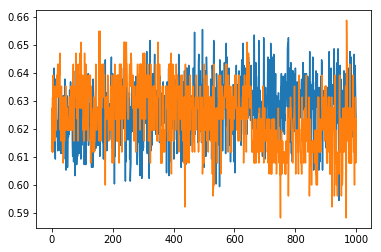

In [54]:
plt.plot(egitim.history["acc"])
plt.plot(egitim.history["val_acc"])
plt.show()